# DRAFT - Data preparation & analysis

This is my original draft, showing all workings. See alternative notebooks 'Data preparation - Prevention duties', 'Initial analysis' for tidy copies.

This notebook imports data from the government homelessness stats, sheet A2P. This shows the number of prevention duties owed per local authority per quarter, broken down into reasons for homelessness.

The data is cleaned and prepared for analysis, then data from more quarters is imported and cleaned in the same way. This data is joined into a single dataframe.

In [4]:
#Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_A2P_P2.csv')

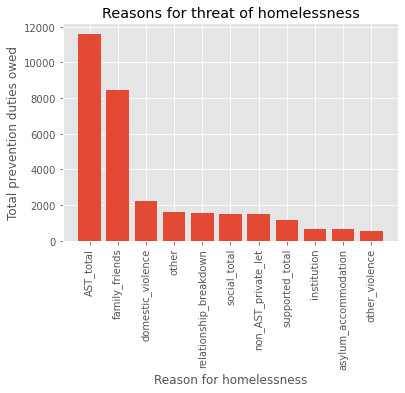

<Figure size 432x288 with 0 Axes>

In [29]:
#Filtering the dataset to just show the aggregated categories

df_categories = df[['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']]
df_categories.head()

#Plotting a bar chart showing the most common reasons for threat of homelessness

homelessness_reasons = df_categories.columns[3:]
homelessness_reasons_summed = df[homelessness_reasons].sum().sort_values(ascending=False)

plt.bar(homelessness_reasons_summed.index, homelessness_reasons_summed)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Total prevention duties owed')
plt.show()
plt.clf()

In [30]:
#Calculating the above reasons for homelessness as a proportion of the total, for each local authority

for column in homelessness_reasons:
    df['percentage_' + column] = (df[column] / df['total_prevention_duty']).round(2)

In [31]:
#Showing a filtered dataframe with just the calculated percentages

df_percentages = df.filter(df.columns[0:2].tolist() + [column for column in df.columns if 'percentage' in column])

display(df_percentages.head())

df_percentages.describe()

,ONS_code,local_authority,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
0,E07000223,Adur,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
1,E07000026,Allerdale,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10
2,E07000032,Amber Valley,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03
3,E07000224,Arun,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01
4,E07000170,Ashfield,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04


,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.390227,0.050844,0.255162,0.058506,0.064903,0.015162,0.046948,0.031526,0.018312,0.013571,0.055325
std,0.136590,0.052376,0.102186,0.068680,0.051451,0.020007,0.062058,0.031008,0.027721,0.023174,0.065618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290000,0.020000,0.190000,0.030000,0.030000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000
50%,0.370000,0.040000,0.250000,0.050000,0.060000,0.010000,0.030000,0.030000,0.010000,0.000000,0.040000
75%,0.480000,0.060000,0.310000,0.080000,0.090000,0.020000,0.060000,0.040000,0.020000,0.020000,0.070000
max,0.940000,0.470000,0.620000,1.000000,0.270000,0.190000,0.510000,0.170000,0.230000,0.140000,0.600000


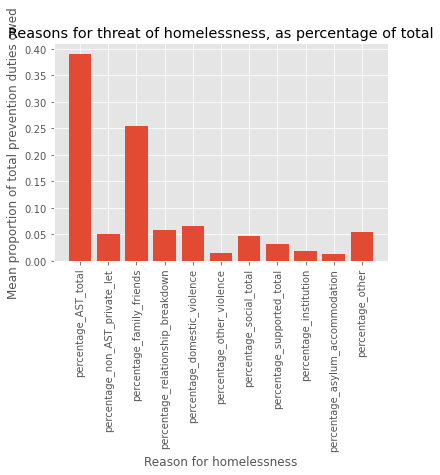

In [32]:
#Showing the calculated percentages as a bar chart

#percentages_mean = df[df_percentages.columns[2:]].mean().sort_values(ascending=False)
percentages_mean = df[df_percentages.columns[2:]].mean()

plt.bar(percentages_mean.index, percentages_mean)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness, as percentage of total')
plt.xlabel('Reason for homelessness')
plt.ylabel('Mean proportion of total prevention duties owed')
plt.show()

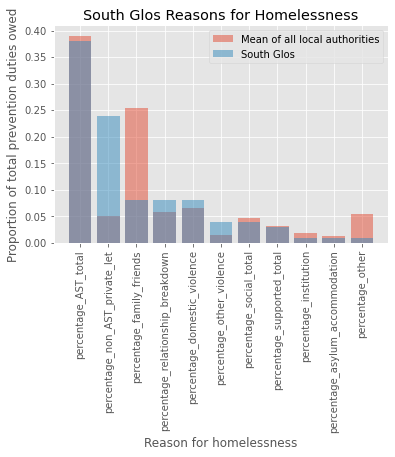

In [33]:
percentages_SG = df.loc[df['local_authority'] == 'South Gloucestershire'][df_percentages.columns[2:]].squeeze().sort_values(ascending=False)

plt.bar(percentages_mean.index, percentages_mean, label='Mean of all local authorities', alpha=0.5)
plt.bar(percentages_mean.index, percentages_SG, label='South Glos', alpha=0.5)
plt.xticks(rotation=90)
plt.title('South Glos Reasons for Homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Proportion of total prevention duties owed')
plt.legend()
plt.show()

In [34]:
percentages_SG.describe

<bound method NDFrame.describe of percentage_AST_total                 0.38
percentage_family_friends            0.24
percentage_relationship_breakdown    0.08
percentage_social_total              0.08
percentage_supported_total           0.08
percentage_non_AST_private_let       0.04
percentage_domestic_violence         0.04
percentage_other                     0.03
percentage_other_violence            0.01
percentage_institution               0.01
percentage_asylum_accommodation      0.01
Name: 228, dtype: float64>

In [ ]:
total_per_quarter = joined_df_A2P.groupby(['year', 'quarter'])['total_prevention_duty'].sum()

total_per_quarter

In [ ]:
print(total_per_quarter.index)
total_per_quarter.index = total_per_quarter.index.map(lambda x: f"Q{x[1]}-{x[0]}")

print(total_per_quarter.index)

In [ ]:
print(total_per_quarter.values)

In [ ]:
#Line chart showing how the total number of prevention cases have changed over time

plt.plot(total_per_quarter.index, total_per_quarter.values)
plt.xticks(rotation=45)
plt.ylabel('Total Prevention Cases')
plt.xlabel('Year - Quarter')
plt.title('Total Prevention Cases Over Time')
plt.show()

In [ ]:
#Which authorities have the highest percentage of homelessness from the private sector?

#Filter to just show authorities with over 150 prevention cases per quarter. These percentages will be more meaningful.
over_150_preventions = joined_df_A2P[joined_df_A2P['total_prevention_duty'] > 150]

#For each authority, average the percentage of homelessness from AST across the quarters
to_plot = over_150_preventions.groupby('local_authority')['percentage_AST_total'].mean().sort_values()

#Plot onto a bar chart

fig, ax = plt.subplots(figsize=(16, 25))
ax.barh(to_plot.index, to_plot)
plt.title('Percentage of homelessness from private sector')
plt.xlabel('Percentage of prevention duties due to end of AST')
plt.ylabel('Local Authority')
plt.xticks(np.arange(0, 1.1, 0.1))
ax.tick_params(labeltop=True)
plt.ylim(-1, 112)
plt.show()

In [ ]:
#Now import and clean the same data but tab P2 (successful preventions by accommodation)

def to_csv_P2(yearquarter):
    # Specify path to .ods file
    file_path = "C:/Users/lucyf/Coding/Homelessness/data/DetailedLA_" + str(yearquarter) + ".ods"
    # Load the data from the A2P tab
    df = pd.read_excel(file_path, sheet_name="P2")
    # Specify the path to save the CSV file
    output_path = "C:/Users/lucyf/Coding/Homelessness/data/P2_" + str(yearquarter) + ".csv"
    # Save the data as a CSV file
    df.to_csv(output_path, index=False)
    #Load the CSV into Pandas
    return pd.read_csv(output_path)

In [ ]:
def clean_df_P2(df, year, quarter):
    
    #Dropping blank spacer columns
    blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
    df.drop(blank_columns, axis=1, inplace=True)
    
    #Dropping blank, header and note rows
    df.dropna(subset=[df.columns[0]], axis=0, inplace=True)
    df = df[df[df.columns[0]].str.contains('^E\d')]
    
    #Renaming columns
    df.columns=['ONS_code', 'local_authority', 'total_successful_prevention', 'total_PRS', 'PRS_sc', 'PRS_HMO', 'PRS_lodging', 'total_SRS', 'SRS_council', 'SRS_RP', 'SRS_supported', 'family', 'friends', 'owner_occupier', 'other', 'not_known']
    
    #Removing the aggregated regional data
    region_df = df[:11]
    df = df[11:]
    df = df.reset_index(drop=True)
    
    #Finding null values and replacing the string representation
    for column in df.columns[2:]:
        df[column].replace("..", np.nan, inplace=True)
        df[column] = df[column].astype(float)
    
    #Setting new columns with the relevant year and quarter
    df['year'] = int(year)
    df['quarter'] = int(quarter)
    
    #Filling null values with the mean of the column
    for column in df:
        if df[column].isnull().sum() >0:
            df[column].fillna(round(df[column].mean()), inplace=True)
    
    #Adding columns showing percentage of total for each reason for homelessness
    df_categories = df[['total_PRS', 'PRS_sc', 'PRS_HMO', 'PRS_lodging', 'total_SRS', 'SRS_council', 'SRS_RP', 'SRS_supported', 'family', 'friends', 'owner_occupier', 'other', 'not_known']]
    homelessness_reasons = df_categories.columns[3:]
    for column in homelessness_reasons:
        df['percentage_' + column] = (df[column] / df['total_successful_prevention']).round(2)
   
    return df #, region_df

In [ ]:
#Commenting out this cell now that the new joined dataframe has been created and saved as a csv, as it is very slow to run

"""df_22Q3_P2 = clean_df_P2(to_csv_P2(202212), 2022, 3)

df_22Q2_P2 = clean_df_P2(to_csv_P2(202209), 2022, 2)

df_22Q1_P2 = clean_df_P2(to_csv_P2(202206), 2022, 1)

df_21Q4_P2 = clean_df_P2(to_csv_P2(202203), 2021, 4)

df_21Q3_P2 = clean_df_P2(to_csv_P2(202112), 2021, 3)

df_21Q2_P2 = clean_df_P2(to_csv_P2(202109), 2021, 2)

df_21Q1_P2 = clean_df_P2(to_csv_P2(202106), 2021, 1)

df_20Q4_P2 = clean_df_P2(to_csv_P2(202103), 2020, 4)

df_20Q3_P2 = clean_df_P2(to_csv_P2(202012), 2020, 3)

df_20Q2_P2 = clean_df_P2(to_csv_P2(202009), 2020, 2)

df_20Q1_P2 = clean_df_P2(to_csv_P2(202006), 2020, 1)

In [ ]:
#Joining all quarters into a master dataframe

dataframes = [df_22Q3_P2, df_22Q2_P2, df_22Q1_P2, df_21Q4_P2, df_21Q3_P2, df_21Q2_P2, df_21Q1_P2, df_20Q4_P2, df_20Q3_P2, df_20Q2_P2, df_20Q1_P2]

joined_df_P2 = pd.concat(dataframes)

#Saving master dataframe to my computer so I can comment out the functions above which are importing and cleaning each file

joined_df_P2.to_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_P2.csv', index=False)

joined_df_P2 = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_P2.csv')

In [ ]:
print(joined_df_P2.head())
print(joined_df_P2.tail())